In [1]:
# Data processing
import numpy as np
import pandas as pd
import datetime as dt

# Visualization libaries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning
from sklearn.model_selection import train_test_split
#import xgboost as xgb

train = pd.read_csv('train.csv', nrows=30000)
test = pd.read_csv('test.csv')


#### This data has 10000000 rows and 8 features. We just use 500000 of them.

In [2]:
#Name of  Features

train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [3]:
# Downcasting data types to reduce memory consumption
dtypes = {}
for key in ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']:
    dtypes[key] = 'float32'
for key in ['passenger_count']:
    dtypes[key] = 'uint8'

In [4]:

train.index

RangeIndex(start=0, stop=30000, step=1)

In [5]:
df=pd.DataFrame(train)

In [6]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.50,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.90,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.70,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.70,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.30,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.10,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.50,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.50,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.00,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.90,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [ ]:
print([train.])

In [7]:
dftest=pd.DataFrame(test)

In [8]:
dftest

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
5,2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
6,2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
7,2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
8,2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.014099,40.709638,-73.995106,40.741365,1
9,2014-02-18 15:22:20.0000002,2014-02-18 15:22:20 UTC,-73.969582,40.765519,-73.980686,40.770725,1


#### Now we plot some of the data in training sets on the map, we do not need data that are far from data in the test set..

In [9]:
print(test.pickup_longitude.min(),test.pickup_longitude.max(),test.pickup_latitude.min(),test.pickup_latitude.max())
print(test.dropoff_longitude.min(),test.dropoff_longitude.max(),test.dropoff_latitude.min(),test.dropoff_latitude.max())

-74.252193 -72.986532 40.573143 41.709555
-74.263242 -72.990963 40.568973 41.696683


In [10]:
Size=(-74.2,-73.5,40.5,41)
zoom_size=(-74.3,-73.7,40.5,40.9)

In [11]:
print(train.pickup_longitude.min(),train.pickup_longitude.max(),train.pickup_latitude.min(),train.pickup_latitude.max())
print(train.dropoff_longitude.min(),train.dropoff_longitude.max(),train.dropoff_latitude.min(),train.dropoff_latitude.max())

-75.414728173543 40.783471999999996 -74.006893 401.083332
-84.654241 40.802437 -74.006377 43.41519


In [12]:
Size_1=(-2986.3,2140.6,-3116.3,1703,-3383.3,40.8,-2559.8,404.6)

In [13]:
nyc_map=plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')

In [14]:
nyc_map_zoom=plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')

In [15]:
def plot_on_map(train,size,nyc_map,s=10,alpha=0.2):
    fig,axs=plt.subplots(1,2,figsize=(16,10))
    axs[0].scatter(train.pickup_longitude,train.pickup_latitude,zorder=1,alpha=alpha,c='r',s=s)
    axs[0].set_xlim((Size[0],Size[1]))
    axs[0].set_ylim((Size[2],Size[3]))
    axs[0].set_title(('Pick up location'))
    axs[0].imshow(nyc_map,zorder=0,extent=Size)
    
    axs[1].scatter(train.dropoff_longitude,train.dropoff_latitude,zorder=1,alpha=alpha,c='r',s=s)
    axs[1].set_xlim((Size[0],Size[1]))
    axs[1].set_ylim((Size[2],Size[3]))
    axs[1].set_title(('Drop off location'))
    axs[1].imshow(nyc_map,zorder=0,extent=Size)

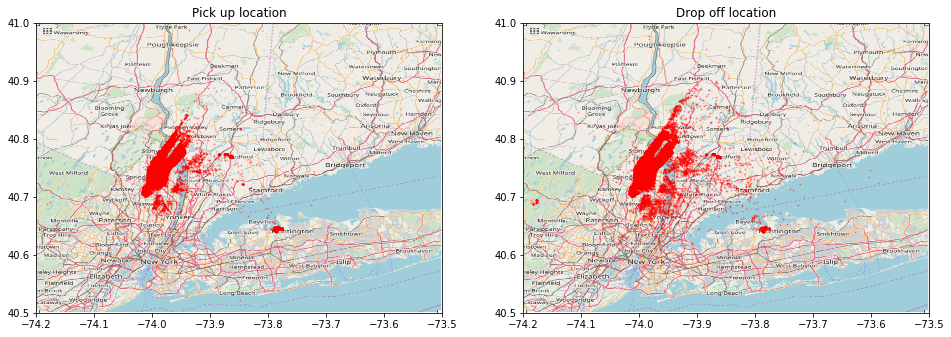

In [16]:
plot_on_map(train,Size,nyc_map,s=1,alpha=0.3)

In [17]:
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

#### I will delete all rows with 
#### Pickup_longitude< -75 or pickup_longitude> -71
#### Pickup_latitude< 39 or pickup_latitude> 42
#### from training  set as we have no test data on those coordinate.

In [18]:
pickuplongitude_coordinate_drop_min=train[train['pickup_longitude']<-75].index

In [19]:
train.drop(pickuplongitude_coordinate_drop_min , inplace=True)

In [20]:
pickuplongitude_coordinate_drop_max=train[train['pickup_longitude']>-71].index


In [21]:
train.drop(pickuplongitude_coordinate_drop_max , inplace=True)

In [22]:
pickuplatitude_coordinate_drop_min=train[train['pickup_latitude']<39].index


In [23]:
train.drop(pickuplatitude_coordinate_drop_min , inplace=True)

In [24]:
pickuplatitude_coordinate_drop_max=train[train['pickup_latitude']>42].index

In [25]:
train.drop(pickuplatitude_coordinate_drop_max , inplace=True)

In [26]:
train.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            29990, 29991, 29992, 29993, 29994, 29995, 29996, 29997, 29998,
            29999],
           dtype='int64', length=29415)

#### I will delete data with
#### dropoff_longitude< -75 or dropoff_longitude> -71
#### dropoff_latitude< 39 or dropoff_latitude> 42
#### from trainning set. Since we have no test data on those coordinate

In [27]:
 dropoff_longitude_coordinate_drop_min=train[train['dropoff_longitude']<-75].index

In [28]:
train.drop( dropoff_longitude_coordinate_drop_min , inplace=True)

In [29]:
 dropoff_longitude_coordinate_drop_max=train[train['dropoff_longitude']>-71].index

In [30]:
train.drop( dropoff_longitude_coordinate_drop_max , inplace=True)

In [31]:
 dropoff_latitude_coordinate_drop_min=train[train['dropoff_latitude']<39].index

In [32]:
train.drop( dropoff_latitude_coordinate_drop_min , inplace=True)

In [33]:
 dropoff_latitude_coordinate_drop_max=train[train['dropoff_latitude']>42].index

In [34]:
train.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            29990, 29991, 29992, 29993, 29994, 29995, 29996, 29997, 29998,
            29999],
           dtype='int64', length=29390)

In [35]:
print(train.pickup_longitude.min(),train.pickup_longitude.max(),train.pickup_latitude.min(),train.pickup_latitude.max())
print(train.dropoff_longitude.min(),train.dropoff_longitude.max(),train.dropoff_latitude.min(),train.dropoff_latitude.max())

-74.7 -72.85696800000001 39.603177685149 41.391042
-74.689830775147 -72.85494 39.60497150365 41.391042


In [36]:
# Is there any trip with no passenger? yes

train.passenger_count.values.min()

0

In [37]:
# Get names of rows for which column passenger-count have value 0
passengerCountZero= train[train['passenger_count'] == 0 ].index


In [38]:
train.drop(passengerCountZero , inplace=True)

In [39]:
train.passenger_count.values.min()

1

In [40]:
train.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            29990, 29991, 29992, 29993, 29994, 29995, 29996, 29997, 29998,
            29999],
           dtype='int64', length=29284)

In [41]:
#Is there any non value.

train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

## Till now, there is no row with null feature and  zero passenger

In [42]:
train.fare_amount.min()


-3.0

In [43]:
train.fare_amount.max()

200.0

In [44]:
FareAmountLessThanZero=train[train['fare_amount']<=0].index

In [45]:
train.drop(FareAmountLessThanZero , inplace=True)

In [46]:
train.fare_amount.min()

0.01

In [47]:
train.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            29990, 29991, 29992, 29993, 29994, 29995, 29996, 29997, 29998,
            29999],
           dtype='int64', length=29279)

In [48]:
df=pd.DataFrame(train)

In [49]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.50,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.90,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.70,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.70,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.30,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.10,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.50,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.50,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.00,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.90,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [51]:
train.index=range(29279)

In [52]:
train.index

RangeIndex(start=0, stop=29279, step=1)

In [53]:
df=pd.DataFrame(train)

In [54]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.50,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.90,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.70,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.70,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.30,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.10,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.50,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.50,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.00,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.90,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


#### As we can see on the map, some of pickup and dropoff are on the water so there are noise. I delete all of these noise from training set.

In [55]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'], infer_datetime_format=True)
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'], infer_datetime_format=True)


#### Defining X_train and X_test

In [56]:
# Get the data ready for training and predicting

y_train = train.fare_amount
X_train = train.drop(['fare_amount'], axis = 1)
X_train = X_train.drop(['pickup_datetime'],axis = 1)
X_train=X_train.drop(['key'],axis=1)
X_test = test.drop(['pickup_datetime'],axis = 1)
X_test=X_test.drop(['key'],axis=1)

In [57]:
X_test.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

#### Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#### Splitting the dataset into the Training set and Test set with test validation.

In [59]:
from sklearn.model_selection import (cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV)


In [60]:
X_train_valid, X_test_valid, y_train_valid, y_test_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=2018)

In [61]:
print([y_test_valid.mean(),y_test_valid.var()])

[11.240676229508233, 92.45618765535946]


#### Feature Scaling

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_valid= sc.fit_transform(X_train_valid)
X_test_valid = sc.fit_transform(X_test_valid)

# Linear regression

In [63]:
from sklearn.linear_model import LinearRegression


In [64]:
linear_reg = LinearRegression()

In [65]:
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
y_pred = linear_reg.predict(X_test)

In [67]:
# Create csv file for submission
linearreg = pd.DataFrame()
linearreg['key'] = test.key
linearreg['fare_amount'] = y_pred
linearreg.to_csv('sub_with_linear_reg', index = False)

In [68]:
print(linearreg)

                                key  fare_amount
0       2015-01-27 13:08:24.0000002    10.741966
1       2015-01-27 13:08:24.0000003    10.788484
2       2011-10-08 11:53:44.0000002    10.617256
3       2012-12-01 21:12:12.0000002     9.228773
4       2012-12-01 21:12:12.0000003     9.781233
5       2012-12-01 21:12:12.0000005    11.800602
6       2011-10-06 12:10:20.0000001    12.215710
7       2011-10-06 12:10:20.0000003    28.214208
8       2011-10-06 12:10:20.0000002     9.419786
9       2014-02-18 15:22:20.0000002     9.925209
10      2014-02-18 15:22:20.0000003    10.335009
11      2014-02-18 15:22:20.0000001    10.183637
12      2010-03-29 20:20:32.0000002     9.913229
13      2010-03-29 20:20:32.0000001     8.345854
14      2011-10-06 03:59:12.0000002    10.468100
15      2011-10-06 03:59:12.0000001    10.759870
16      2012-07-15 16:45:04.0000006     8.550156
17      2012-07-15 16:45:04.0000002    10.184709
18      2012-07-15 16:45:04.0000003    10.776815
19      2012-07-15 1

#### linear regression with test validation

In [69]:
linear_reg.fit(X_train_valid,y_train_valid)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
y_pred_valid=linear_reg.predict(X_test_valid)

In [71]:
print([y_pred_valid.mean(),y_pred_valid.var()])

[11.381377705673913, 20.15634613806596]


In [72]:
# Create csv file for submission
linearreg_valid = pd.DataFrame()
linearreg_valid['target'] =y_test_valid
linearreg_valid['fare_amount'] = y_pred_valid
linearreg_valid.to_csv('sub_with_linear_reg', index = False)

In [73]:
print(linearreg_valid)

       target  fare_amount
28791    19.3    10.633425
13409     6.5    11.607681
22168     7.7    11.814273
26190    14.5     8.974435
20308    23.0    10.492159
26637     2.5     9.322286
14815     8.5    10.236147
1256      3.3    12.646788
17297     6.5     9.478488
17432    48.0    34.873109
16581     3.7    11.092832
14560    18.1    17.592465
10422     7.5     9.914516
5963      4.9     8.506286
18755     5.7    11.201553
21369    14.1    10.612399
16395    12.1    10.829222
28349    17.3     9.874273
11259     9.5     9.319877
8055     20.0    10.746337
20336    11.7    12.371057
19128    12.9     9.707105
479       6.0     8.241668
2649     12.5    11.371597
3112     42.0    32.385054
25773     9.3    10.899116
21409     7.3    11.906699
7872      4.5     8.110382
2491      8.5    11.219753
24809     8.9    10.623234
...       ...          ...
14374    15.0    10.797569
25807     8.0    11.850265
1592      6.0     9.773973
14123    10.0    10.080598
12825    13.3    14.630535
1

# KNN

In [74]:
from sklearn.neighbors import KNeighborsRegressor

In [75]:
from sklearn import neighbors, datasets

In [76]:
knn=neighbors.KNeighborsRegressor(n_neighbors=5,weights='uniform')

In [77]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [78]:
y_pred=knn.predict(X_test)

In [79]:
# Create csv file for submission
df_knn = pd.DataFrame()
df_knn['key'] = test.key
df_knn['fare_amount'] = y_pred
df_knn.to_csv('sub_with_knn', index = False)

In [80]:
print(df_knn)

                                key  fare_amount
0       2015-01-27 13:08:24.0000002        8.920
1       2015-01-27 13:08:24.0000003        7.320
2       2011-10-08 11:53:44.0000002        5.180
3       2012-12-01 21:12:12.0000002        9.220
4       2012-12-01 21:12:12.0000003       17.660
5       2012-12-01 21:12:12.0000005        8.420
6       2011-10-06 12:10:20.0000001        5.000
7       2011-10-06 12:10:20.0000003       50.300
8       2011-10-06 12:10:20.0000002       12.400
9       2014-02-18 15:22:20.0000002        4.900
10      2014-02-18 15:22:20.0000003        8.100
11      2014-02-18 15:22:20.0000001       13.520
12      2010-03-29 20:20:32.0000002        4.700
13      2010-03-29 20:20:32.0000001        7.140
14      2011-10-06 03:59:12.0000002        7.820
15      2011-10-06 03:59:12.0000001       14.440
16      2012-07-15 16:45:04.0000006       13.200
17      2012-07-15 16:45:04.0000002        9.040
18      2012-07-15 16:45:04.0000003        5.120
19      2012-07-15 1

In [81]:
knn.fit(X_train_valid,y_train_valid)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [82]:
y_pred_valid=knn.predict(X_test_valid)

In [83]:
print([y_pred_valid.mean(),y_pred_valid.var()])

[10.94981181693989, 73.79716432319368]


In [84]:
# Create csv file for submission
df_knn_valid = pd.DataFrame()
df_knn_valid['target'] = y_test_valid
df_knn_valid['fare_amount'] = y_pred_valid
df_knn_valid.to_csv('sub_with_knn_valid', index = False)

In [85]:
print(df_knn_valid)

       target  fare_amount
28791    19.3       14.680
13409     6.5        7.300
22168     7.7        8.020
26190    14.5       13.340
20308    23.0       17.160
26637     2.5        5.940
14815     8.5       11.620
1256      3.3        3.720
17297     6.5        9.580
17432    48.0       45.620
16581     3.7        5.260
14560    18.1       32.246
10422     7.5        7.000
5963      4.9        5.000
18755     5.7        5.780
21369    14.1       16.140
16395    12.1       11.220
28349    17.3       16.020
11259     9.5       10.880
8055     20.0       18.140
20336    11.7        9.880
19128    12.9       11.060
479       6.0        6.900
2649     12.5        9.300
3112     42.0       45.860
25773     9.3       10.400
21409     7.3        7.000
7872      4.5        5.140
2491      8.5        9.760
24809     8.9        6.760
...       ...          ...
14374    15.0       11.680
25807     8.0       14.120
1592      6.0        3.700
14123    10.0       12.180
12825    13.3       24.672
1

### Parameter Tunning

In [88]:
#search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 30)
# empty list to store scores
k_mean = []
k_var=[]

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = knn.predict(X_test)
    # 4. append mean of scores for k neighbors to k_scores list
    k_mean.append(scores.mean())
    k_var.append(scores.var())



Text(0,0.5,'KNeighborsRegressor mean')

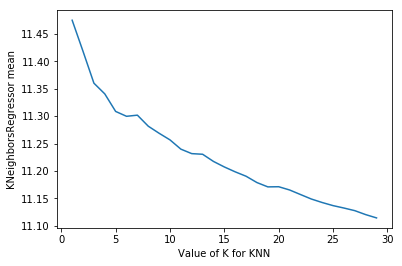

In [92]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_mean)
plt.xlabel('Value of K for KNN')
plt.ylabel('KNeighborsRegressor mean')


Text(0,0.5,'KNeighborsRegressor var')

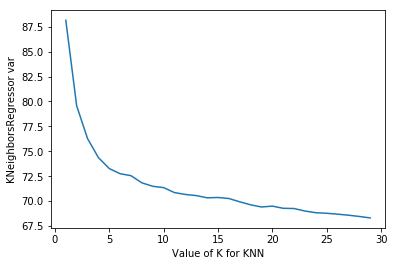

In [93]:

plt.plot(k_range, k_var)
plt.xlabel('Value of K for KNN')
plt.ylabel('KNeighborsRegressor var')

## Decision Tree

In [94]:
from sklearn.tree import DecisionTreeRegressor  
  

In [95]:
D3=DecisionTreeRegressor(random_state = 0)  

In [96]:
D3.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [97]:
y_pred=D3.predict(X_test)

In [98]:
# Create csv file for submission
df_D3 = pd.DataFrame()
df_D3['key'] = test.key
df_D3['fare_amount'] = y_pred
df_D3.to_csv('sub_with_D3', index = False)

In [99]:
print(df_D3)

                                key  fare_amount
0       2015-01-27 13:08:24.0000002          6.9
1       2015-01-27 13:08:24.0000003         10.5
2       2011-10-08 11:53:44.0000002          4.5
3       2012-12-01 21:12:12.0000002          6.1
4       2012-12-01 21:12:12.0000003         15.5
5       2012-12-01 21:12:12.0000005          8.0
6       2011-10-06 12:10:20.0000001          6.5
7       2011-10-06 12:10:20.0000003         49.8
8       2011-10-06 12:10:20.0000002         15.3
9       2014-02-18 15:22:20.0000002          5.0
10      2014-02-18 15:22:20.0000003          7.5
11      2014-02-18 15:22:20.0000001         13.7
12      2010-03-29 20:20:32.0000002          4.5
13      2010-03-29 20:20:32.0000001          7.0
14      2011-10-06 03:59:12.0000002         10.5
15      2011-10-06 03:59:12.0000001         13.5
16      2012-07-15 16:45:04.0000006          4.5
17      2012-07-15 16:45:04.0000002          6.5
18      2012-07-15 16:45:04.0000003          5.3
19      2012-07-15 1

In [100]:
D3.fit(X_train_valid,y_train_valid)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [102]:
y_pred_valid=D3.predict(X_test_valid)

In [103]:
print([y_pred_valid.mean(),y_pred_valid.var()])

[11.206898907103826, 89.16286610043596]


In [114]:
# Create csv file for submission
df_D3_valid = pd.DataFrame()
df_D3_valid['target'] = y_test_valid
df_D3_valid['fare_amount'] = y_pred_valid
df_D3_valid.to_csv('sub_with_D3', index = False)

In [115]:
print(df_D3_valid)

       target  fare_amount
28791    19.3        14.00
13409     6.5         8.10
22168     7.7         8.90
26190    14.5        12.30
20308    23.0        17.30
26637     2.5         6.05
14815     8.5        12.50
1256      3.3         3.00
17297     6.5         7.00
17432    48.0        53.10
16581     3.7         4.90
14560    18.1        18.80
10422     7.5         4.90
5963      4.9         5.40
18755     5.7         6.10
21369    14.1        20.40
16395    12.1        11.50
28349    17.3        14.30
11259     9.5        10.50
8055     20.0        15.60
20336    11.7        11.75
19128    12.9        12.75
479       6.0         7.70
2649     12.5         7.70
3112     42.0        29.50
25773     9.3        15.00
21409     7.3        13.25
7872      4.5         6.05
2491      8.5        13.50
24809     8.9        10.75
...       ...          ...
14374    15.0        10.50
25807     8.0        11.70
1592      6.0         3.10
14123    10.0        11.70
12825    13.3         9.35
1

#### Now, i will use D3 with oother parameters. like max depth

In [116]:
DD3=DecisionTreeRegressor(random_state = 0,min_samples_split=3)  

In [117]:
DD3.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [118]:
y_pred=DD3.predict(X_test)

In [119]:
# Create csv file for submission
df_DD3 = pd.DataFrame()
df_DD3['key'] = test.key
df_DD3['fare_amount'] = y_pred
df_DD3.to_csv('sub_with_DD3', index = False)

In [120]:
print(df_DD3)

                                key  fare_amount
0       2015-01-27 13:08:24.0000002        6.900
1       2015-01-27 13:08:24.0000003       10.300
2       2011-10-08 11:53:44.0000002        4.500
3       2012-12-01 21:12:12.0000002        6.100
4       2012-12-01 21:12:12.0000003       15.600
5       2012-12-01 21:12:12.0000005        8.000
6       2011-10-06 12:10:20.0000001        6.500
7       2011-10-06 12:10:20.0000003       49.800
8       2011-10-06 12:10:20.0000002       14.900
9       2014-02-18 15:22:20.0000002        4.950
10      2014-02-18 15:22:20.0000003        7.500
11      2014-02-18 15:22:20.0000001       15.300
12      2010-03-29 20:20:32.0000002        4.500
13      2010-03-29 20:20:32.0000001        6.300
14      2011-10-06 03:59:12.0000002       10.500
15      2011-10-06 03:59:12.0000001       13.800
16      2012-07-15 16:45:04.0000006        4.500
17      2012-07-15 16:45:04.0000002        6.700
18      2012-07-15 16:45:04.0000003        5.650
19      2012-07-15 1

In [121]:
DD3.fit(X_train_valid,y_train_valid)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [123]:
y_pred_valid=DD3.predict(X_test_valid)

In [124]:
print([y_pred_valid.mean(),y_pred_valid.var()])

[11.1778125, 89.02784133847763]


In [126]:
# Create csv file for submission
df_DD3_valid = pd.DataFrame()
df_DD3_valid['target']=y_test_valid
df_DD3_valid['fare_amount'] = y_pred_valid
df_DD3_valid.to_csv('sub_with_DD3_valid', index = False)

In [127]:
print(df_DD3_valid)

       target  fare_amount
28791    19.3        14.00
13409     6.5         8.10
22168     7.7         8.90
26190    14.5        12.30
20308    23.0        17.30
26637     2.5         6.05
14815     8.5        12.50
1256      3.3         3.00
17297     6.5         7.00
17432    48.0        53.10
16581     3.7         4.90
14560    18.1        18.80
10422     7.5         4.90
5963      4.9         5.40
18755     5.7         6.10
21369    14.1        20.40
16395    12.1        11.50
28349    17.3        14.30
11259     9.5        10.50
8055     20.0        15.60
20336    11.7        11.75
19128    12.9        12.75
479       6.0         7.70
2649     12.5         7.70
3112     42.0        29.50
25773     9.3        15.00
21409     7.3        13.25
7872      4.5         6.05
2491      8.5        13.50
24809     8.9        10.75
...       ...          ...
14374    15.0        10.50
25807     8.0        11.70
1592      6.0         3.10
14123    10.0        11.70
12825    13.3         9.35
1

# ParameterTunning

In [129]:
#search for an optimal value of min_samples_split for Decision Tree


min_samples_split_range = range(2, 10)
# empty list to store scores
k_mean = []
k_var=[]

# 1. we will loop through reasonable values of k
for k in min_samples_split_range:
    # 2. run KNeighborsClassifier with k neighbours
    D3 =DecisionTreeRegressor(random_state = 0,min_samples_split=k)  
    D3.fit(X_train,y_train)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = D3.predict(X_test)
    # 4. append mean of scores for k neighbors to k_scores list
    k_mean.append(scores.mean())
    k_var.append(scores.var())


Text(0,0.5,'Decision Tree.mean')

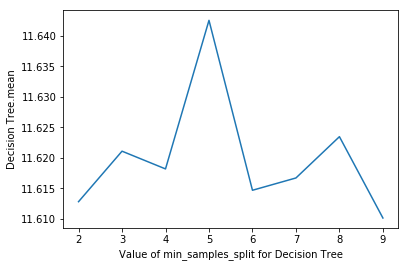

In [133]:
plt.plot(min_samples_split_range,k_mean)
plt.xlabel('Value of min_samples_split for Decision Tree')
plt.ylabel('Decision Tree.mean')


Text(0,0.5,'Decision Tree.var')

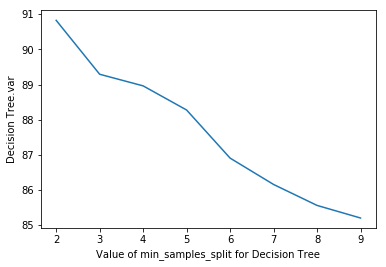

In [134]:
plt.plot(min_samples_split_range,k_var)
plt.xlabel('Value of min_samples_split for Decision Tree')
plt.ylabel('Decision Tree.var')

## SVM

In [135]:
from sklearn.svm import SVR

In [156]:
sv = SVR(kernel='rbf',gamma='auto', C=1.0, epsilon=0.5)


In [157]:
sv.fit(X_train,y_train) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.5, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [158]:
y_pred=sv.predict(X_test)

In [159]:
# Create csv file for submission
svdataframe = pd.DataFrame()
svdataframe['key'] = test.key
svdataframe['fare_amount'] = y_pred
svdataframe.to_csv('sub_with_SVM_regression', index = False)

In [160]:
svdataframe

,key,fare_amount
0,2015-01-27 13:08:24.0000002,7.891347
1,2015-01-27 13:08:24.0000003,8.260846
2,2011-10-08 11:53:44.0000002,5.892337
3,2012-12-01 21:12:12.0000002,7.310731
4,2012-12-01 21:12:12.0000003,14.893547
5,2012-12-01 21:12:12.0000005,9.332382
6,2011-10-06 12:10:20.0000001,5.525006
7,2011-10-06 12:10:20.0000003,51.450847
8,2011-10-06 12:10:20.0000002,10.826282
9,2014-02-18 15:22:20.0000002,6.403951


### SV: test validation

In [161]:
sv.fit(X_train_valid,y_train_valid)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.5, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [162]:
y_pred_valid=sv.predict(X_test_valid)

In [163]:
print([y_pred_valid.mean(),y_pred_valid.var()])

[10.562545923665345, 63.16120843379992]


In [164]:
# Create csv file for submission
svdataframe = pd.DataFrame()
svdataframe['key'] = y_test_valid
svdataframe['fare_amount'] = y_pred_valid
svdataframe.to_csv('sub_with_SVM_regression', index = False)

In [165]:
svdataframe

,key,fare_amount
28791,19.3,14.807679
13409,6.5,6.710189
22168,7.7,9.811612
26190,14.5,12.526652
20308,23.0,16.916754
26637,2.5,6.255423
14815,8.5,9.961294
1256,3.3,5.073718
17297,6.5,7.708500
17432,48.0,38.116837
